### Prediction Model for Flight Fare

##### Shreya Todmal
        
     Life- Cycle of  this Data Science Project :
        a) Data collection
        b) Perform Data Cleaning / Data Preparation / Data Pre-processing 
        c) Data visuaslisation(EDA)
        d) Perform feature engineering
            I)  Feature encoding
            II) checking outliers & impute it
            III)Feature selection or feature importance
            
        e) build machine leaning model
        f) Automate ML Pipeline 
        g) Dump the appropriate model

    

#### Importing libraries 

In [4]:
## import necessary packages !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset
    Since data is in form of excel file use pandas read_excel to load the data


In [5]:
train_data = pd.read_excel(r"C:\Users\Shreya\Documents\Data Analytics Project\Flight Fare prediction\Data_Train.xlsx")

In [6]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [7]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### Data Cleaning

#### 1) Missing Values

In [8]:
train_data.info() # check if all non null values are same

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB




features belong to object data-type , ie.. in context to Python , they belong to string data-type

            
1 feature belong to int64 nature  , ie 
Variations of int are : ('int64','int32','int16') in numpy library
The only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8

That means that Int64’s take up twice as much memory-and doing 
operations on them may be a lot slower in some machine architectures.

However, Int64’s can represent numbers much more accurately than 
32 bit floats.They also allow much larger numbers to be stored..


The memory usage of a DataFrame (including the index) is shown when calling the info(). 
A configuration option, display.memory_usage (see the list of options), specifies if the DataFrame’s memory usage 
 will be displayed when invoking the df.info() method..
 
memory usage: 918.2+ KB 
The + symbol indicates that the true memory usage could be higher, 
because pandas does not count the memory used by values in columns with dtype=object


Passing memory_usage='deep' will enable a more accurate memory usage report .



In [12]:
# After loading it is important to check null/missing values in a column or a row
# Missing value :  values which occur when no data is recorded for an observation..

train_data.isnull().sum()

# by-default axis is 0 , ie it computes total missing values column-wise !

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [14]:
# getting all the rows where we have missing value

train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


##### as we have 1 missing value , directly drop these

In [15]:
train_data.dropna(inplace=True)

In [16]:
train_data.isnull().sum() # check again for missing value

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [17]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [19]:
# In order to more accurate memory usage ,leverage memory_usage="deep" in info()
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


#### 2) Data Pre-process & extract Derived attributes from "Date_of_Journey"
        Extract derived attributes from "Date_of_Journey" & fetch day , month , year 

In [20]:
data = train_data.copy()

In [21]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [22]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [23]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### From description we can see that Date_of_Journey is a object data type,
     Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our 
     model will not be able to understand these string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.

In [24]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [25]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [26]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [27]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

In [28]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [29]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [30]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [31]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [32]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-18 05:50:00,2024-08-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-18 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


#### 3) clean Dep_Time & Arrival_Time & then extract Derived attributes

In [33]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [34]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [35]:
# Departure time is when a plane leaves the gate. 

extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-18 05:50:00,2024-08-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-18 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [36]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-18 05:50:00,2024-08-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-18 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [37]:
# we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [38]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [39]:
data.shape

(10682, 16)

### Data Analysis

#### 1) Analyse when will most of the flights take-off..

In [40]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [41]:
# Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    
    '''
    
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

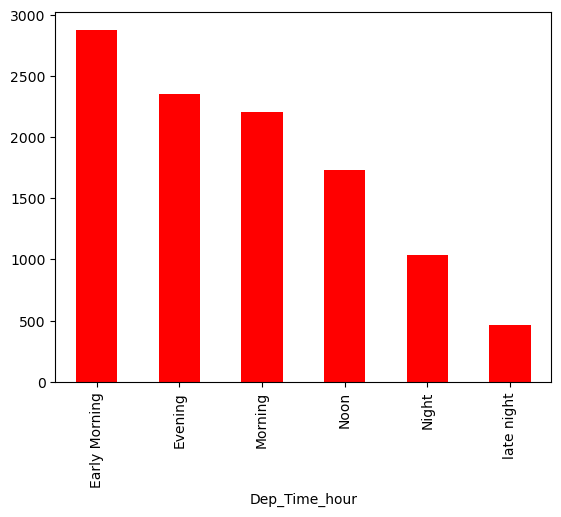

In [42]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="r")

In [38]:
#### To make above graph interactive use Cufflinks & plotly 

In [54]:
#!pip install plotly
#!pip install chart_studio

In [55]:
#!pip install cufflinks

In [43]:
# use Plotly interactive plots directly with Pandas dataframes

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

# plot is a command of Matplotlib which is more old-school. It creates static charts
# iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.
# It is available only in jupyter ntbk and google collab


In [44]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

### 2) Pre-process Duration Feature & extract meaningful features from it

#####  Apply pre-processing on duration column,
    -->> Once we pre-processed the Duration feature extract Duration hours and minute from duration
    
    -->> As ML model is not able to understand this duration as it contains string values , 
    thats why we have to convert this in hour &  minute for each of the row 

In [45]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [46]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [47]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [48]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object


    Now after pre-processing duration feature , still ml_model is not able to understand duration 
    bcz it is string data so any how we have to convert it into numerical(integer of float) values



In [49]:
data['Duration'][0]

'2h 50m'

In [50]:
'2h 50m'.split(' ')

['2h', '50m']

In [51]:
'2h 50m'.split(' ')[0]

'2h'

In [52]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [53]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [54]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [55]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [56]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [57]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [58]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [59]:
pd.to_timedelta(data["Duration"]).dt.components.hours

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: hours, Length: 10682, dtype: int64

In [60]:
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours

In [61]:
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

#### 3) Analyse whether Duration impacts Price or not ?

In [63]:
data['Duration'] # convert duration into total minutes duration 

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [64]:
eval('2*60') # explaination of below step, where elav function can be used to evaluate on string

120

In [65]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [66]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [67]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

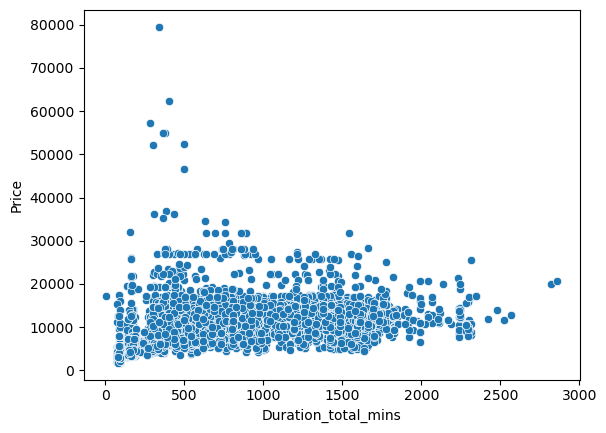

In [68]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data) # to be used when there is continous data


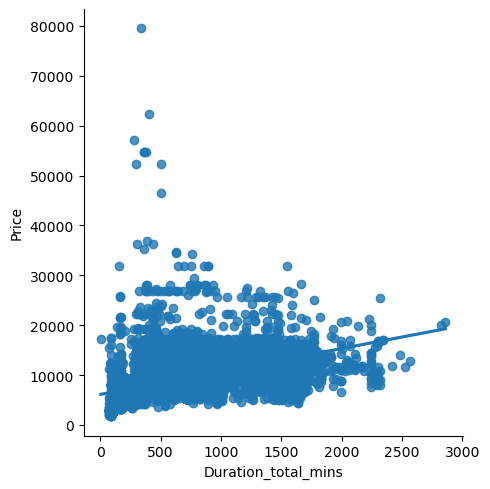

In [69]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data) #regression plot

# pretty clear that As the duration of minutes increases Flight price also increases.

In [70]:
# understand whether total stops affect price or not !

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

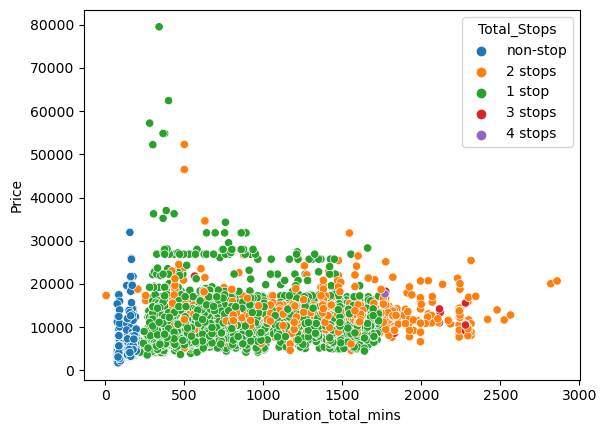

In [71]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)


Non stops flights take less duration while their fare is also low, then as the stop increases, 
duration also increases and price also increases(in most of the cases)



#### 4) which route Jet Airways is extremely used?

In [72]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [73]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

#### 5) Performing Airline vs Price Analysis
        ie find price distribution & 5-point summary of each Airline

In [74]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

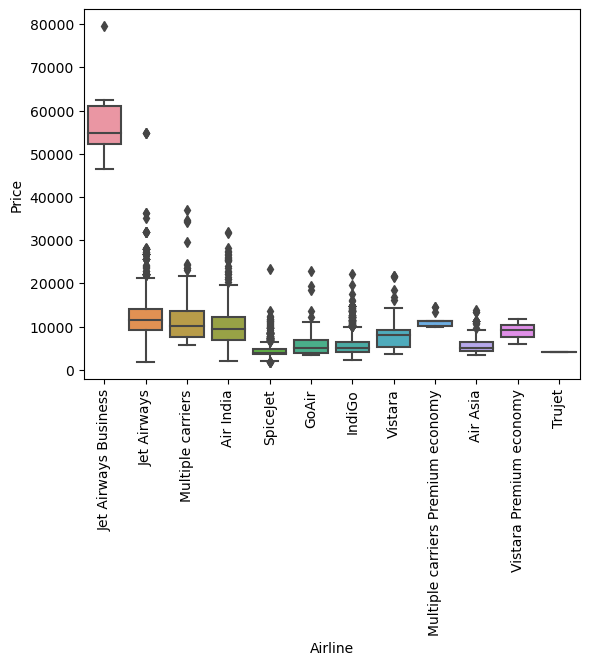

In [75]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()



Conclusion--> From graph we can see that Jet Airways Business have the highest Price., 
              Apart from the first Airline almost all are having similar median



### Feature Engineering
#### 1) Applying one-hot Encoding on data

In [76]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2019,22,20,1,10,2,50,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,2019,5,50,13,15,7,25,7,25,445



Categorical data refers to a data type that can be stored into groups/categories/labels 
Examples of categorical variables are  age group, educational level,blood type etc.. 


Numerical data refers to the data that is in the form of numbers, 
Examples of numerical data are height, weight, age etc.. 

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. 
                In case of infinity, these numbers will keep going on...
                age of a fly : 8 , 9 day etc..
                
Continuous data : which is continuous in nature 
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !



In [77]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [78]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

#### 2) Handling Categorical Data
    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case
    

In [79]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [80]:
# Applying One-hot from scratch :

In [81]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [82]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [83]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [84]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


#### 3) Perform target guided encoding on Data
    We can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    Use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..



Now on 2 features , Airline & Destination , we can apply on-hot as there is no such order
but total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..
similarly if we have any feature which have more categories , it is not good to apply one-hot as it will create 
curse of dimensionality issue , which leads to usage of more resources of your pc..

So appplying mean Encoding or better techniques like Target Guided Ordinal Encoding 




In [85]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [86]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0


In [87]:
data['Airline'].nunique()

12

In [88]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [89]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [90]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [91]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [92]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [93]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [94]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [95]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


In [96]:
# now perform Target Guided Mean encoding on 'Destination'

In [97]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)



till now , Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar) 
which is neighbouring part of Delhi so we will consider New Delhi & Delhi as same

but in future , these conditions may change..




In [98]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [99]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [100]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [101]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [102]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [103]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [104]:
data['Destination'] = data['Destination'].map(dict_dest)

In [105]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [106]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


#### 4) Perform Label(Manual) Encoding on Data

In [107]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


In [108]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [109]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
# As this is case of Ordinal Categorical type we perform Label encoding from scratch 
# Here Values are assigned with corresponding key

In [110]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [111]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [112]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

#### 4) Remove Un-necessary features 

In [113]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0


In [114]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [115]:
data['Additional_Info'].value_counts()/len(data)*100

# Additional_Info contains almost 80% no_info,so drop this column

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [116]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,5,25,5,25,325,0,1,0,0,0


In [117]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [118]:
data['Journey_year'].unique()

array([2019])



Drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..
Additional_Info contains almost 80% no_info , so we can drop this column ..
Drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
Drop "Source" feature as well as we have already perform feature encoding on this Feature 
Drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..



In [119]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year'] , axis=1 , inplace=True)

In [120]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [121]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,...,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,...,10,2,50,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,...,15,7,25,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,...,25,19,0,19,0,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,18,5,...,30,5,25,5,25,0,1,0,0,0


In [122]:
data.drop(columns=['Route'] , axis=1 , inplace=True)

## drop Route bcz Route is directly related to Total stops & considering 2 same features doesnt make sense while building ML model..

In [126]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,19,0,0,0,1,0,0


#### 5) Perform 0utlier detection 

#### Here the list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Scatter plot.
    3. Histogram.
    4. Distribution Plot.


In [127]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

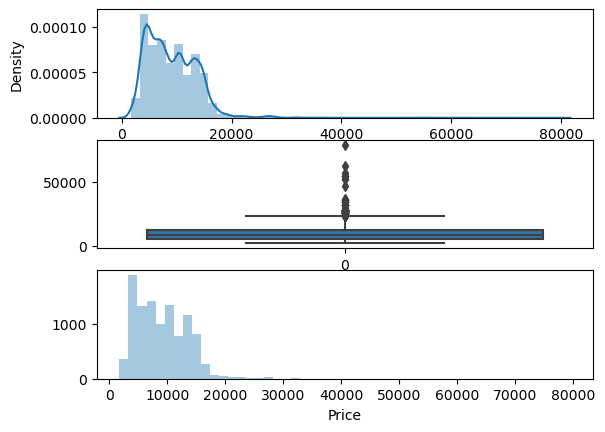

In [128]:
plot(data , 'Price')

        If Features are Skewed use the below Technique which is IQR
        Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are outliers
        where ,  IQR = 75th%ile data - 25th%ile data
         
         & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR 
          


In [129]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [130]:
print(maximum)

23017.0


In [131]:
print(minimum)

-5367.0


In [132]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [133]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

#### 6) Deal with Outlier

In [134]:
# wherever price >35K just replace replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

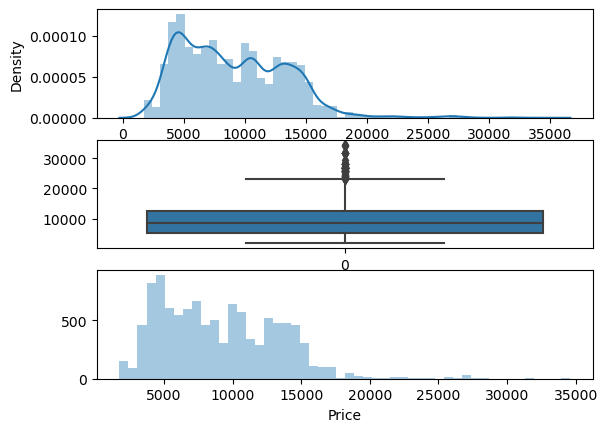

In [135]:
plot(data , 'Price')

### Feature Selection


    Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
    
    Q-> Why to apply Feature Selection?
    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features
    


In [136]:
X = data.drop(['Price'] , axis=1)

In [137]:
y = data['Price']

In [138]:
from sklearn.feature_selection import mutual_info_regression

In [139]:
imp = mutual_info_regression(X , y)


Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables. 
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.




In [140]:
imp

array([0.9703245 , 1.00843625, 0.78757166, 0.23196788, 0.62690735,
       0.33440916, 0.2636411 , 0.38914304, 0.3522347 , 0.46376704,
       0.33497637, 0.42039949, 0.3478449 , 0.38981863, 0.45136283,
       0.52037359, 0.12622555, 0.18960283])

In [141]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [142]:
imp_df.columns = ['importance']

In [143]:
imp_df

,importance
Airline,0.970325
Destination,1.008436
Total_Stops,0.787572
Journey_day,0.231968
Journey_month,0.626907
Dep_Time_hour,0.334409
Dep_Time_minute,0.263641
Arrival_Time_hour,0.389143
Arrival_Time_minute,0.352235
Duration_hours,0.463767


In [144]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Destination,1.008436
Airline,0.970325
Total_Stops,0.787572
Journey_month,0.626907
Source_Delhi,0.520374
Duration_hours,0.463767
Source_Kolkata,0.451363
Duration_hour,0.420399
Source_Banglore,0.389819
Arrival_Time_hour,0.389143


###  Machine Learning Model

#### split dataset into train & test

In [145]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

In [171]:
from sklearn.ensemble import RandomForestRegressor

In [172]:
ml_model = RandomForestRegressor()

In [173]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [174]:
y_pred = ml_model.predict(X_test)

In [175]:
y_pred

array([16930.72,  5372.24,  8890.42, ...,  3491.81,  6403.65,  6878.93])

In [176]:
from sklearn import metrics

In [177]:
metrics.r2_score(y_test , y_pred)

0.8106484475983164

### Automate ml pipeline & define Evaluation metric

#### 1) make our own metric

In [161]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [162]:
mape(y_test , y_pred)

13.262759339262784

#### 2) Automate ml pipeline 



    Lets automate all the stuffs
    just pass ml algo & get several results like--
    
    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error




In [163]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [169]:
def predict(mlmodel):
    model = mlmodel.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    # Plotting the distribution of errors
    plt.figure(figsize=(10, 6))
    sns.distplot(y_test - y_predection, bins=30, kde=True)
    plt.title(f'Error Distribution for {ml_model.__class__.__name__}')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.show()
    
    # Cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(ml_model, X_train, y_train, cv=cv, scoring='r2')
    print(f'Cross-validated R2 scores: {cv_scores}')
    print(f'Mean CV R2 score: {cv_scores.mean():.4f}')
    print('-' * 50)

Training score : 0.9515029799312105
predictions are : [16859.81  5402.85  8854.98 ...  3518.68  6279.77  6854.59]


r2 score : 0.8110384504791415
MAE : 1175.577388469667
MSE : 3678627.798231426
RMSE : 1917.9749211685294
MAPE : 13.174772900885989


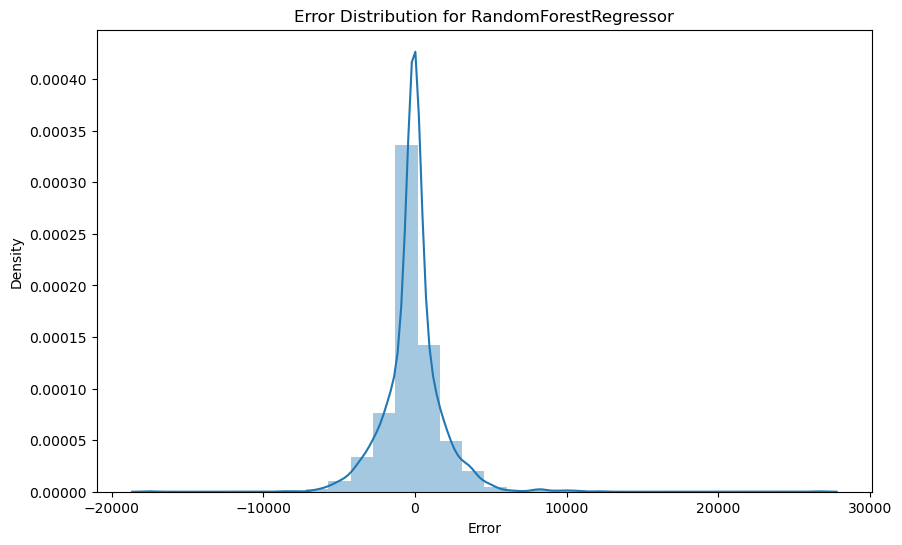

Cross-validated R2 scores: [0.81437113 0.78265293 0.81377621 0.81415118 0.80749271]
Mean CV R2 score: 0.8065
--------------------------------------------------


In [165]:
predict(RandomForestRegressor())

Training score : 0.966591628243878
predictions are : [16840.  4959.  8085. ...  3419.  5797.  6442.]


r2 score : 0.6813523199496411
MAE : 1407.6086359665544
MSE : 6203305.469538459
RMSE : 2490.643585408892
MAPE : 15.512905195789797


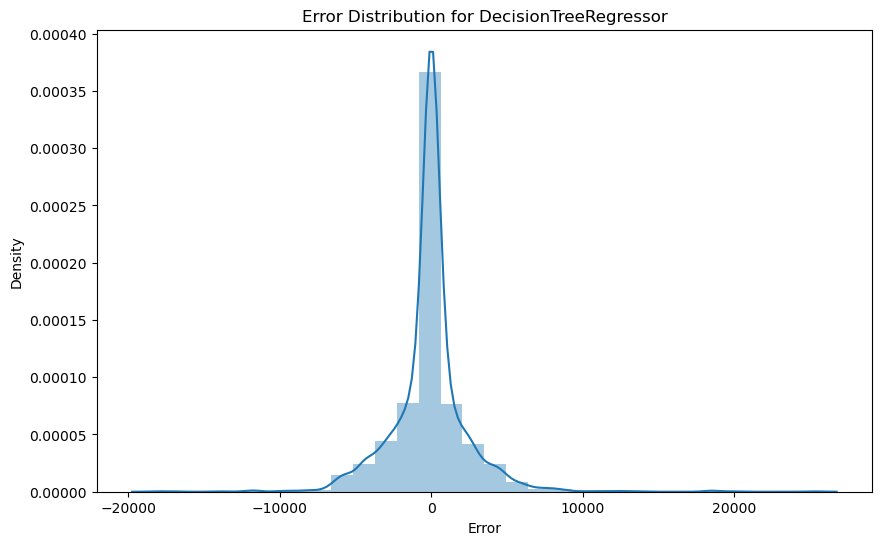

Cross-validated R2 scores: [0.68215263 0.6614025  0.72106648 0.7133294  0.66456947]
Mean CV R2 score: 0.6885
--------------------------------------------------


In [166]:
predict(DecisionTreeRegressor())

Training score : 0.5974311101154715
predictions are : [12668.50092552  8108.02334286  9087.41658728 ...  3329.01067447
  8902.54439747  7581.7554673 ]


r2 score : 0.5725924273245007
MAE : 2012.5827755770702
MSE : 8320599.518819858
RMSE : 2884.5449413763445
MAPE : 24.829513004041935


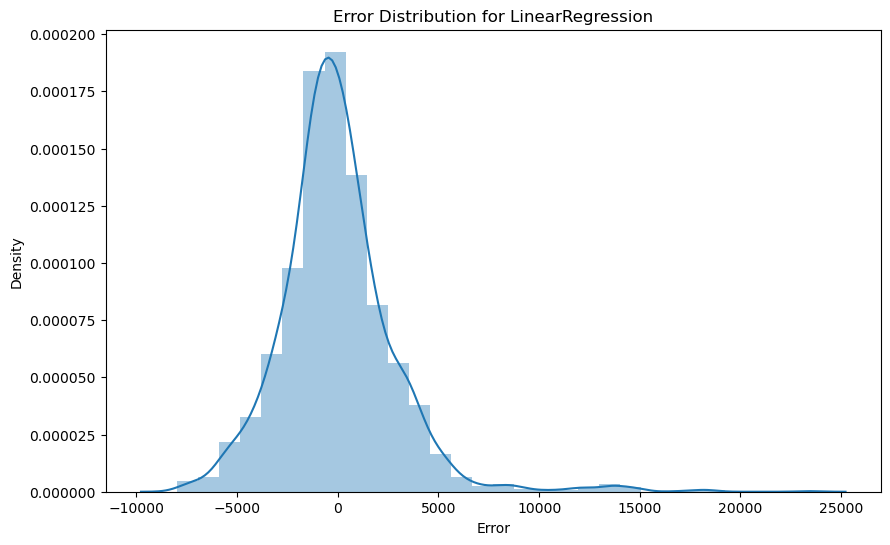

Cross-validated R2 scores: [0.56800856 0.61638543 0.58441762 0.61559058 0.59269228]
Mean CV R2 score: 0.5954
--------------------------------------------------


In [167]:
# Apply LinearRegression
predict(LinearRegression())

Training score : 0.7730773965679995
predictions are : [16315.   5158.2  8536.  ...  4125.6 11656.4  8159.2]


r2 score : 0.629671023909574
MAE : 1746.0433545488581
MSE : 7209416.251037063
RMSE : 2685.0356144820616
MAPE : 19.657698932146968


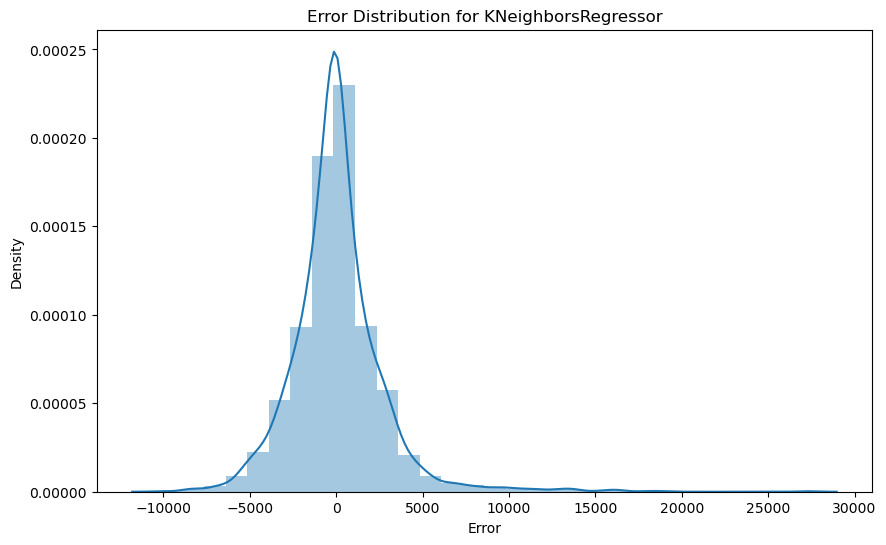

Cross-validated R2 scores: [0.59094561 0.59957088 0.62058308 0.64303244 0.60554159]
Mean CV R2 score: 0.6119
--------------------------------------------------


In [168]:
# Apply KNeighborsRegressor
predict(KNeighborsRegressor())

Thus it is clear that RandomForestRegression is the best ML model for this kind of data set
further saving the trained model as follows:

#### Save Model

#### dump ml model using pickle 
    advantage of dumping--
    imagine in future we have new data & lets say we have to predict price on this huge data

    then to do prediction on this new data , we can use this pre-trained model what we have dumped


In [154]:
import pickle

In [155]:
# open a file, where you want to store the data
file = open(r'C:\Users\Shreya\Documents\Data Analytics Project\Flight Fare prediction\Machine learning model.pkl' , 'wb')

In [156]:
# dump information to that file
pickle.dump(ml_model , file)

In [178]:
model = open(r'C:\Users\Shreya\Documents\Data Analytics Project\Flight Fare prediction\Machine learning model.pkl' , 'rb')

In [179]:
forest = pickle.load(model)

In [180]:
y_pred2 = forest.predict(X_test)

In [181]:
metrics.r2_score(y_test , y_pred2)

0.808079501624755